In [6]:
%matplotlib inline
import os
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import pearsonr, shapiro, anderson
from scipy.spatial import ConvexHull
import matplotlib.ticker as ticker
from exploration.data.data import load_sim_h5
from results_utils import *
from exploration.algorithm.utils.logging import read_config_log

colors_ = ['firebrick', 'darkgreen', 'navy',  'deepskyblue', 'm','goldenrod', 'black', 'grey']

def get_num_interaction(final_thresh, original_thresh, slope):
    interactions = 0
    while final_thresh<original_thresh:
        interactions += 1
        final_thresh = final_thresh/slope
    return interactions

In [21]:
def analyze_agent(conf_file):
    conf = read_config_log(conf_file)
    
    print(conf.keys())
    print(conf['slope'])

    slope = float(conf['slope'])
    original_threshold = float(conf['threshold'][:-1])
    
    interactions_per_unit = []
    with open(conf_file.replace('conf.txt', '_instructor_thresh.txt'), 'r') as f:
        for line in f:
            line.replace('\n','')
            line.replace('\r', '')
            interactions_per_unit += [get_num_interaction(float(line), original_threshold, slope)]
    interactions_per_unit = np.array(interactions_per_unit)
    plt.plot(interactions_per_unit,'ok')
    total_interactions = np.sum(interactions_per_unit>0)
    print(total_interactions)

#         eva_cons_whole = []
#         with open(data_file.replace('sim_data.h5', '_German_Vowels_eval_cons.txt'), 'r') as f:
#             for line in f:
#                 line.replace('\n', '')
#                 line.replace('\r', '')
#                 eva_cons_str = line.split(': ')
#                 #In the newes version the ratio is returned already divided by the len of the eval dataset
#                 eva_cons_whole += [float(eva_cons_str[1])]
                
#         key = conf['type'] + '_' + conf['mode']
#         if 'slope' in directory:
#             key =  key + '_slope'

['idx_sensor', 'slope', 'sm_model', 'German_Vowels_evaluation_file', 'cons_step', 'n_training_samples', 'n_motor', 'im_model', 'w0', 'threshold', 'duration_m2', 'eval_step', 'duration_m1', 'g_im_initialization_method', 'n_experiments', 'f_im', 'n_save_data', 'learner', 'system', 'n_initialization_experiments', 'sm_all_samples', 'f_sm', '{f_cons', 'type', 'damping_factor', 'cons_model', 'random_seed', 'n_sensor', 'sensor_space', 'instructor', 'sound', 'name', 'n_units', 'im_step', 'mode', 'sm_step', 'model_type']
1.0
0


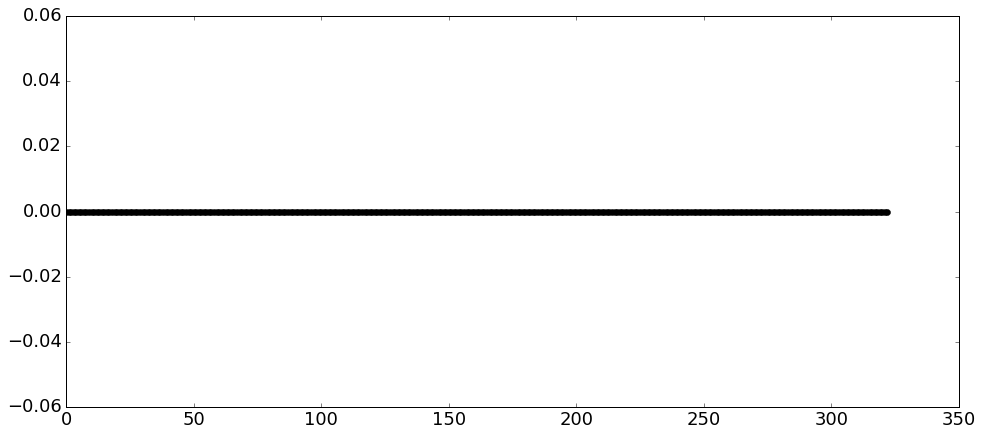

In [23]:
matplotlib.rcParams['figure.figsize'] = (16.0, 7)
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams.update({'lines.linewidth': 2.5})

conf_file = 'diva_results/diva_experiment_thesis_chap_6_social_all_no_slope/proprio0_2018_04_11_00_23_09_conf.txt'
analyze_agent(conf_file)